In [1]:
# Add the current directory to the load path to find the module
using LinearAlgebra
using SparseArrays
using Statistics
using Plots 
using Revise
includet("HubbardModel.jl")
using .HubbardModel

In [2]:
# Example usage
params = HubbardParams(4, 2, 2, 1.0, 4.0)
H = build_hamiltonian(params)
display(H)
E, ψ = eigen(Symmetric(H))
print("Eigenvalues: ", E)
println("Ground state energy: ", E[1])

# Get the ground state wavefunction
ground_state = ψ[:,1]

# Calculate site occupations
up_occ, dn_occ, total_occ = calculate_site_occupations(ground_state, params)

# Calculate spin-spin correlations
spin_corr = calculate_spin_correlation(ground_state, params)

# Display results
println("\nUp spin occupations:")
println(up_occ)

println("\nDown spin occupations:")
println(dn_occ)

println("\nTotal occupations:")
println(total_occ)

println("\nSpin-spin correlations:")
println(spin_corr)


36×36 Matrix{Float64}:
  8.0  -1.0   0.0   0.0  -1.0   0.0  …   0.0   0.0   0.0   0.0   0.0   0.0
 -1.0   4.0  -1.0  -1.0   0.0  -1.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0  -1.0   4.0   0.0  -1.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0  -1.0   0.0   4.0  -1.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
 -1.0   0.0  -1.0  -1.0   4.0  -1.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0  -1.0   0.0   0.0  -1.0   0.0  …   0.0   0.0   0.0   0.0   0.0   0.0
 -1.0   0.0   0.0   0.0   0.0   0.0     -1.0   0.0   0.0   0.0   0.0   0.0
  0.0  -1.0   0.0   0.0   0.0   0.0      0.0  -1.0   0.0   0.0   0.0   0.0
  0.0   0.0  -1.0   0.0   0.0   0.0      0.0   0.0  -1.0   0.0   0.0   0.0
  0.0   0.0   0.0  -1.0   0.0   0.0      0.0   0.0   0.0  -1.0   0.0   0.0
  ⋮                             ⋮    ⋱   ⋮                             ⋮
  0.0   0.0   0.0  -1.0   0.0   0.0      0.0   0.0   0.0  -1.0   0.0   0.0
  0.0   0.0   0.0   0.0  -1.0   0.0      0.0   0.0   0.0   0.0  -1.0   0.0
  0.

hop up workshop down workshop down workshop up workshop down workshop up workshop down workshop down workshop up workshop up workshop down workshop down workshop up workshop down workshop up workshop down workshop up workshop up workshop down workshop up workshop down workshop up workshop up workshop down workshop up workshop down workshop up workshop up workshop down workshop up workshop down workshop up workshop up workshop down workshop down workshop up workshop down workshop up workshop down workshop up workshop down workshop down workshop up workshop down workshop up workshop down workshop up workshop down workshop up workshop down workshop up workshop down workshop down workshop up workshop down workshop up workshop down workshop up workshop down workshop down workshop up workshop down workshop up workshop down workshop up workshop down workshop up workshop down workshop up workshop up workshop down workshop up workshop down workshop up workshop up workshop up workshop down works

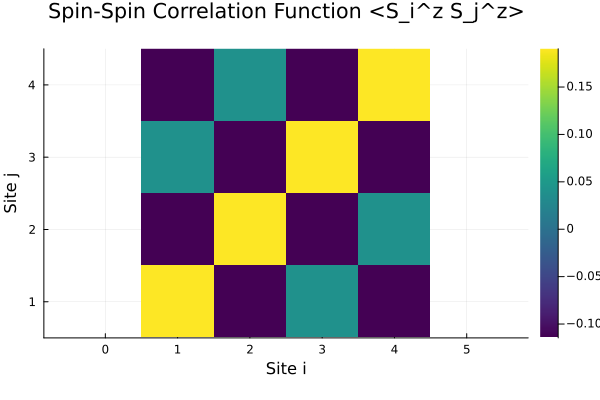

In [3]:
# Visualize site occupations
plot_occupations(up_occ, dn_occ, total_occ)
# Visualize spin-spin correlations
plot_spin_correlation(spin_corr)

U/t = 0.1, Charge Gap = 1.6572962861490375, Avg Double Occ = 0.24668530763218305
U/t = 0.6, Charge Gap = 1.672885813461349, Avg Double Occ = 0.2300857679872641
U/t = 1.1, Charge Gap = 1.7116672343850796, Avg Double Occ = 0.21339012795529394
U/t = 1.6, Charge Gap = 1.7757314198612857, Avg Double Occ = 0.19658001561801558
U/t = 2.1, Charge Gap = 1.8678253001609457, Avg Double Occ = 0.17973127980218837
U/t = 2.6, Charge Gap = 1.9907185000191694, Avg Double Occ = 0.16302428916688017
U/t = 3.1, Charge Gap = 2.146579407674711, Avg Double Occ = 0.1467237167096055
U/t = 3.6, Charge Gap = 2.3365136972988783, Avg Double Occ = 0.13113210082139592
U/t = 4.1, Charge Gap = 2.5603626136743687, Avg Double Occ = 0.11653260863847585
U/t = 4.6, Charge Gap = 2.8167696475064297, Avg Double Occ = 0.1031408473699729
U/t = 5.1, Charge Gap = 3.103443321352387, Avg Double Occ = 0.09107963733019368
U/t = 5.6, Charge Gap = 3.417506179475724, Avg Double Occ = 0.08037888198023083
U/t = 6.1, Charge Gap = 3.755831574

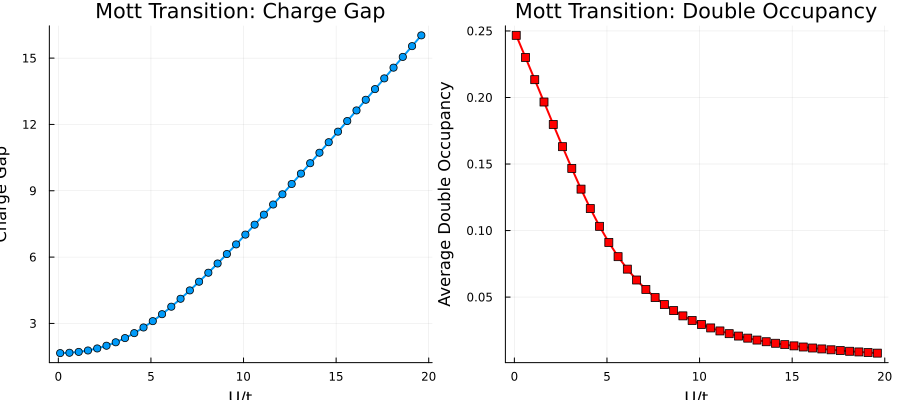

In [ ]:
# Create an array of U/t values to study the Mott transition
U_t_ratios = 0.1:0.5:20.0
L = 4  # System size
N_up = N_dn = L ÷ 2  # Half-filling

# Initialize arrays to store results
charge_gaps = Float64[]
double_occs = Float64[]

# Calculate the charge gap and double occupancy for different U/t values
for U_t in U_t_ratios
    # Set t=1 as energy unit and scale U
    t = 1.0
    U = U_t * t
    
    # Create parameters for this U/t ratio
    params = HubbardParams(L, N_up, N_dn, t, U)
    
    # Build and solve the Hamiltonian
    H = build_hamiltonian(params)
    E, ψ = eigen(Symmetric(H))
    ground_state = ψ[:,1]
    
    # Calculate charge gap
    charge_gap = calculate_charge_gap(params)
    push!(charge_gaps, charge_gap)
    
    # Calculate average double occupancy
    double_occ = calculate_double_occupancy(ground_state, params)
    push!(double_occs, mean(double_occ))
    
    println("U/t = $U_t, Charge Gap = $charge_gap, Avg Double Occ = $(mean(double_occ))")
end

# Create plots
p1 = plot(U_t_ratios, charge_gaps, 
    label="Charge Gap", 
    marker=:circle, 
    linewidth=2,
    xlabel="U/t",
    ylabel="Charge Gap (t)",
    title="Mott Transition: Charge Gap"
)

p2 = plot(U_t_ratios, double_occs,
    label="Double Occupancy", 
    marker=:square, 
    linewidth=2,
    color=:red,
    xlabel="U/t",
    ylabel="Average Double Occupancy",
    title="Mott Transition: Double Occupancy"
)
# Identify the Mott transition point
# Function to find transition from charge gap
function find_gap_transition(U_values, gaps)
    normalized_gaps = gaps ./ maximum(gaps)
    threshold_indices = findall(normalized_gaps .> 0.1)
    return isempty(threshold_indices) ? U_values[argmax(diff(normalized_gaps))] : U_values[threshold_indices[1]]
end

# Function to find transition from double occupancy
function find_docc_transition(U_values, doccs)
    if length(U_values) > 2
        derivatives = diff(doccs) ./ diff(U_values)
        max_drop_idx = argmin(derivatives)
        return (U_values[max_drop_idx] + U_values[max_drop_idx+1])/2
    else
        return U_values[end]
    end
end

# Get transition points using both methods
gap_transition = find_gap_transition(U_t_ratios, charge_gaps)
docc_transition = find_docc_transition(U_t_ratios, double_occs)

# Average the estimates
transition_U_t = (gap_transition + docc_transition) / 2
closest_idx = argmin(abs.(U_t_ratios .- transition_U_t))

# Mark the transition points on both plots
scatter!(p1, [transition_U_t], [charge_gaps[closest_idx]], 
        markersize=8, color=:green, label="Transition")
scatter!(p2, [transition_U_t], [double_occs[closest_idx]], 
        markersize=8, color=:green, label="Transition")

# Add transition point as vertical lines
vline!(p1, [transition_U_t], linestyle=:dash, color=:black, alpha=0.7, label="")
vline!(p2, [transition_U_t], linestyle=:dash, color=:black, alpha=0.7, label="")

println("\nMott transition occurs at approximately U/t = $transition_U_t")
# Display plots side by side
plot(p1, p2, layout=(1,2), size=(900, 400), legend=false)

look into:
itinerant magnetization
different band structures for up/down electrons
gibbs phase role
ordered transition
triple point but no quadruple point
rna/protein folding course
physics: liquid crystals course
